In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [16, 20]
plt.rcParams.update({'font.size': 15})

Populating the interactive namespace from numpy and matplotlib


In [2]:
def housingBuyingDecisionBoundary(Vgrid, V_solve):
    # wealth discretization
    wealthLevel = 300
    polynomialDegree = 1
    numberOfWealthLevel = 400
    ws = jnp.linspace(0, np.power(wealthLevel,1/polynomialDegree), numberOfWealthLevel)**polynomialDegree

    intendedBuyer = []
    ages = []
    for age in range(21, 50):
        for w in ws:
            t = age - 20
            # x = [w,ab,s,e,o,z]
            x = [w, 0, 0, 1, 0, 1]
            # a = [c,b,k,h,action]
            _,a = V_solve(t,Vgrid[:,:,:,:,:,:,t+1],x)
            if a[4] == 1:
                ages.append(age)
                intendedBuyer.append(w)
                break
    return ages, intendedBuyer

Model Solved! 
Model Solved! 


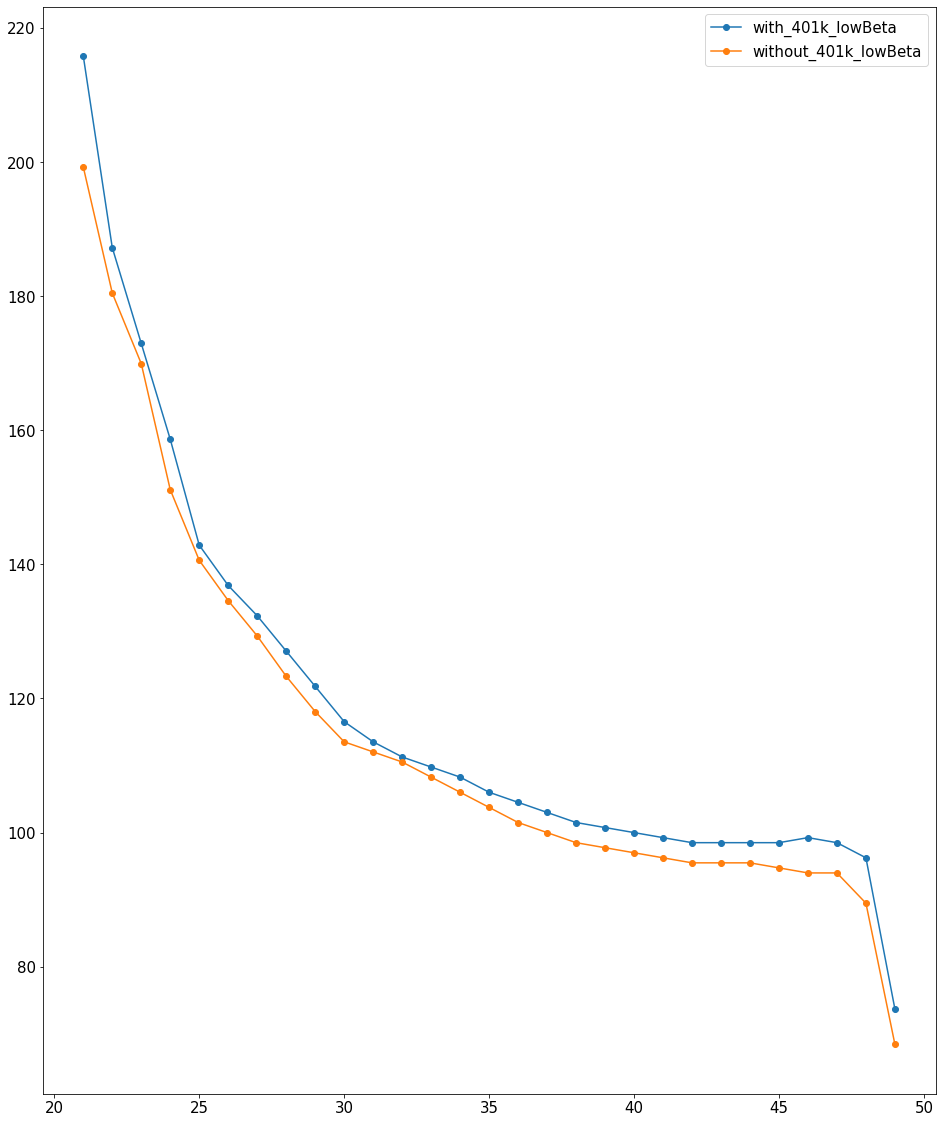

In [3]:
valueFunction1 = "richLow_0.01_2.0.npy"
plt.figure()
from solveMDP_copy import * 
vgrid_whole = np.load(valueFunction1)
ages, wealthLevel =housingBuyingDecisionBoundary(vgrid_whole,  V_solve = V_solve)
plt.plot(ages, wealthLevel, 'o-', label = "with_401k_lowBeta")
from shutDownRetirement.solveMDP_copy import *
vgrid_shutDownRetirement = np.load("shutDownRetirement/" + valueFunction1)
ages, wealthLevel = housingBuyingDecisionBoundary(vgrid_shutDownRetirement, V_solve = V_solve)
plt.plot(ages, wealthLevel, 'o-', label = "without_401k_lowBeta")

plt.legend()

In [4]:
# variable associated with housing and mortgage 
# age limit of buying a house
ageLimit = 30
mortgageLength = 30
# mortgage rate 
rh = 0.045
# housing unit
H = 1000
# max rent unit
Rl = 500
# housing price constant 
pt = 2*250/1000 / 5 * 4.70
# 30k rent 1000 sf
pr = 2*10/1000 * 2 / 5 * 4.70
# constant cost 
c_h = 5
c_s = H*pt*0.4
# Dm is used to update the mortgage payment
Dm = [(1+rh) - rh*(1+rh)**(T_max - t)/((1+rh)**(T_max-t)-1) for t in range(T_min, T_max)]
Dm[-1] = 0
Dm = jnp.array(Dm)
# 30 year mortgage
Ms = []
M = H*pt*0.8
m = M*(1+rh) - Dm[30]*M
for i in range(30, T_max):
    Ms.append(M)
    M = M*(1+rh) - m
Ms.append(0)
Ms = jnp.array(Ms)

In [5]:
m

DeviceArray(23.083221, dtype=float32)

In [6]:
H*pt*0.2

94.00000000000001

In [7]:
# owner_to_be = np.load("../owner_to_be.npy")
# for wealthLevel in [0,5,10,15,20,30,40,50]:
#     investmentRatio = []
#     savingRatio = []
#     for x,t in zip(owner_to_be, range(21,50)):
#         x[0] = x[0] - wealthLevel
#         _,a = V_solve(t,Vgrid[:,:,:,:,:,:,t+1],x)
#         # a = [c,b,k,h,action]
#         investmentRatio.append(a[2]/(a[1]+a[2]))
#         savingRatio.append((a[1]+a[2])/x[0])
#     np.save("../boundaryAnalysis/investmentRatio_without_401k" + str(wealthLevel), investmentRatio)
#     np.save("../boundaryAnalysis/savingRatio_without_401k" + str(wealthLevel), savingRatio)

In [8]:
# '''
#     Policy plot:
#     Input:
#         x = [w,ab,s,e,o,z] single action 
#         x = [0,1, 2,3,4,5] 
#         a = [c,b,k,h,action] single state
#         a = [0,1,2,3,4]
# '''
# wealthLevel = [100, 150, 200, 250]
# ageLevel = [30, 45, 60, 75]

# savingsRatio = []
# investmentsRatio = []
# for wealth in wealthLevel:
#     savingR = []
#     investmentR = []
#     for age in ageLevel:
#         t = age - 20
#         x = [wealth, 0, 4, 1, 0, 1]
#         _,a = V_solve(t,Vgrid[:,:,:,:,:,:,t+1],x)
#         savingR.append((a[1]+a[2])/wealth)
#         investmentR.append(a[2]/(a[1]+a[2]))
#     savingsRatio.append(savingR)
#     investmentsRatio.append(investmentR)

# import pandas as pd
# df_saving = pd.DataFrame(np.array(savingsRatio), columns = ['age '+ str(age) for age in ageLevel], index= ['wealth ' + str(wealth) for wealth in wealthLevel])
# df_investment = pd.DataFrame(np.array(investmentsRatio), columns = ['age '+ str(age) for age in ageLevel], index= ['wealth ' + str(wealth) for wealth in wealthLevel])
# print("savingRatio:")
# display(df_saving)
# print("investmentRatio:")
# display(df_investment)